<a href="https://colab.research.google.com/github/7PAM2015-0509-2023-Group17/Kaggle-Challenge/blob/main/Kaggle_Challenge_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [90]:
# URL to the CSV file on GitHub
train_url = 'https://raw.githubusercontent.com/7PAM2015-0509-2023-Group17/Kaggle-Challenge/main/train.csv'

# Reading the CSV file into pandas DataFrames
train = pd.read_csv(train_url)

# Display the first few rows of the DataFrames to ensure they are loaded correctly
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [91]:
# URL to the CSV file on GitHub
test_url = 'https://raw.githubusercontent.com/7PAM2015-0509-2023-Group17/Kaggle-Challenge/main/test.csv'

# Reading the CSV file into pandas DataFrames
test = pd.read_csv(test_url)

# Display the first few rows of the DataFrames to ensure they are loaded correctly
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [92]:
# Check unique values in CryoSleep and VIP columns
print("\nUnique values in CryoSleep column:")
print(train['CryoSleep'].unique())

print("\nUnique values in VIP column:")
print(train['VIP'].unique())

# Convert CryoSleep and VIP columns to boolean type
train['CryoSleep'] = train['CryoSleep'].astype(bool)
train['VIP'] = train['VIP'].astype(bool)


Unique values in CryoSleep column:
[False True nan]

Unique values in VIP column:
[False True nan]


In [93]:
# Display the columns and their data types after conversion
print("\nColumns and Data Types after conversion:")
print(train.info())

# Summarize the boolean columns
boolean_columns = ['CryoSleep', 'VIP', 'Transported']
for col in boolean_columns:
    print(f"\nSummary of {col}:")
    print(train[col].value_counts(dropna=False))


Columns and Data Types after conversion:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8693 non-null   bool   
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8693 non-null   bool   
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(3), float64(6), object(5)
memory usage: 772.6+ KB
None

Summary of CryoSleep:
CryoSleep
False    5439
True     3254
Name: count, dtype: int64

Summary

In [94]:
# Summary statistics of numerical columns
numerical_columns = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

print(train[numerical_columns].describe())


               Age   RoomService     FoodCourt  ShoppingMall           Spa  \
count  8514.000000   8512.000000   8510.000000   8485.000000   8510.000000   
mean     28.827930    224.687617    458.077203    173.729169    311.138778   
std      14.489021    666.717663   1611.489240    604.696458   1136.705535   
min       0.000000      0.000000      0.000000      0.000000      0.000000   
25%      19.000000      0.000000      0.000000      0.000000      0.000000   
50%      27.000000      0.000000      0.000000      0.000000      0.000000   
75%      38.000000     47.000000     76.000000     27.000000     59.000000   
max      79.000000  14327.000000  29813.000000  23492.000000  22408.000000   

             VRDeck  
count   8505.000000  
mean     304.854791  
std     1145.717189  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%       46.000000  
max    24133.000000  


## **EDA**

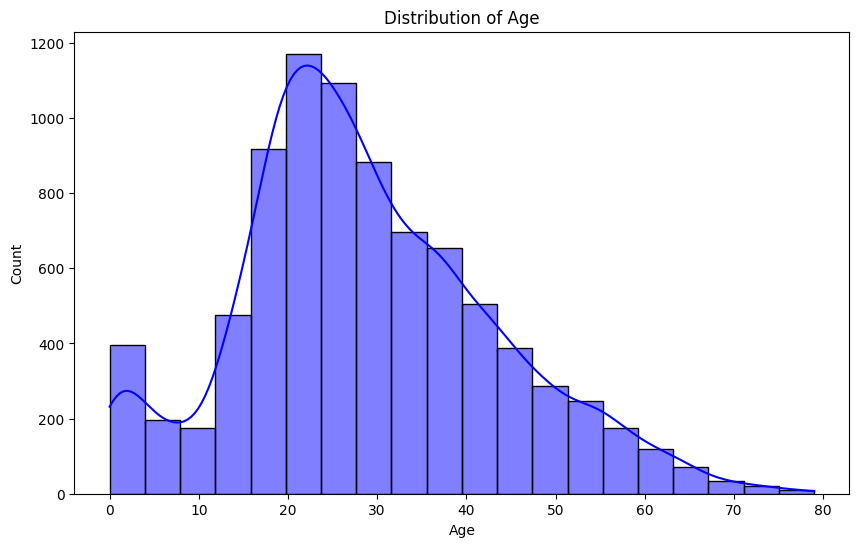

In [95]:
# Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(train['Age'].dropna(), bins=20, kde=True, color='blue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

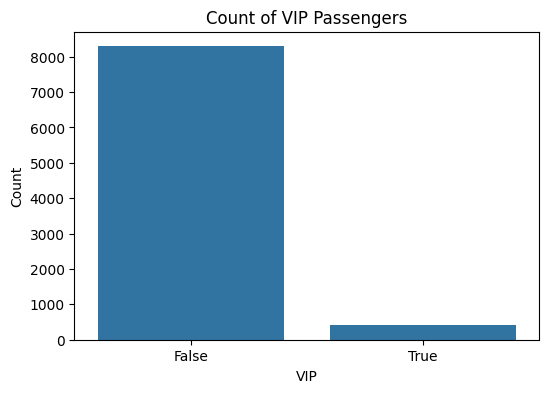

In [96]:
# Count of VIP Passengers
plt.figure(figsize=(6, 4))
sns.countplot(x='VIP', data=train)
plt.title('Count of VIP Passengers')
plt.xlabel('VIP')
plt.ylabel('Count')
plt.show()


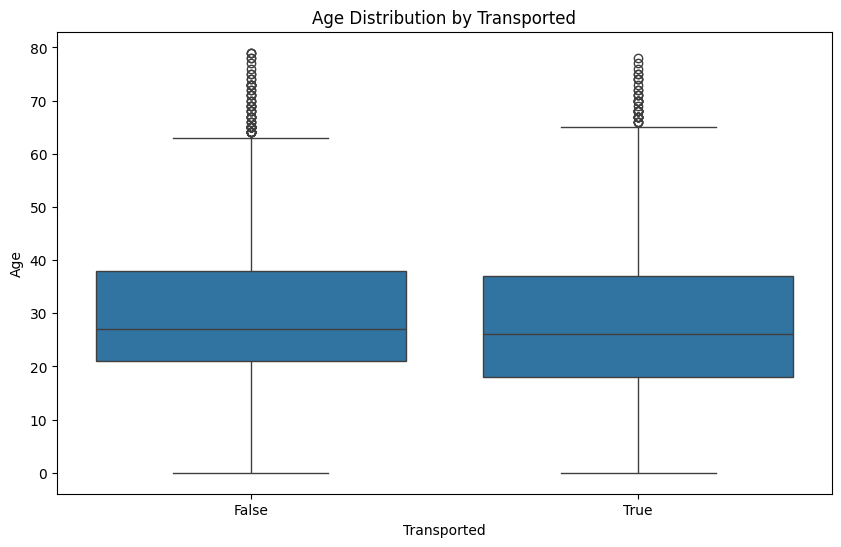

In [97]:
# Relationship Between Age and Transported
plt.figure(figsize=(10, 6))
sns.boxplot(x='Transported', y='Age', data=train)
plt.title('Age Distribution by Transported')
plt.xlabel('Transported')
plt.ylabel('Age')
plt.show()


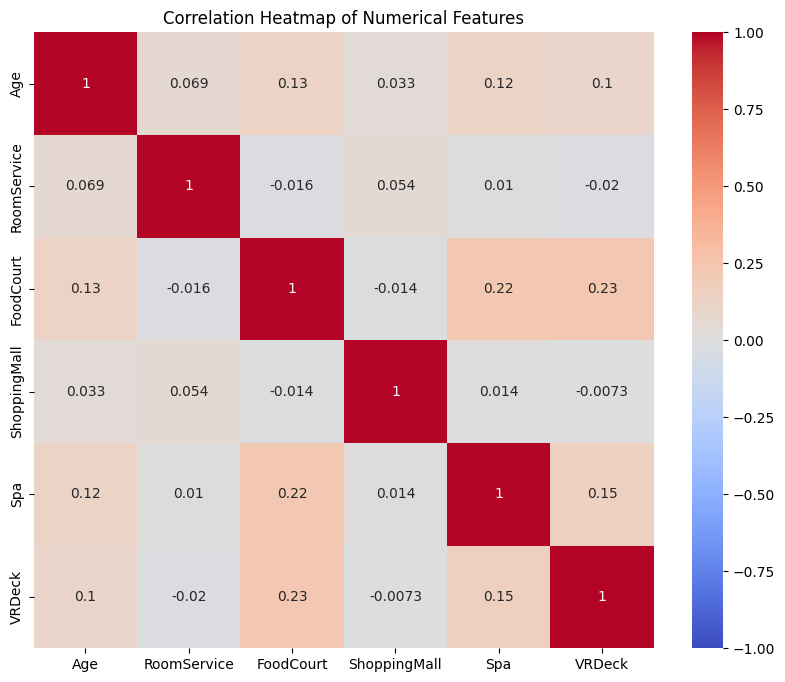

In [98]:
# Correlation Heatmap of Numerical Features
plt.figure(figsize=(10, 8))
sns.heatmap(train[numerical_columns].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


In [99]:
# Step 1: Handling Missing Values
# Identify columns with missing values
missing_columns = train.columns[train.isnull().any()]
print("Columns with missing values:")
print(missing_columns)

# Impute missing values in numerical columns with mean
imputer = SimpleImputer(strategy='most_frequent')
train[missing_columns] = imputer.fit_transform(train[missing_columns])


Columns with missing values:
Index(['HomePlanet', 'Cabin', 'Destination', 'Age', 'RoomService', 'FoodCourt',
       'ShoppingMall', 'Spa', 'VRDeck', 'Name'],
      dtype='object')


In [ ]:
#test[missing_columns] = imputer.fit_transform(test[missing_columns])

In [100]:
# Verify if there are any remaining missing values after imputation
print("\nTrain dataset info after handling missing values:")
print(train.info())


Train dataset info after handling missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   PassengerId   8693 non-null   object
 1   HomePlanet    8693 non-null   object
 2   CryoSleep     8693 non-null   bool  
 3   Cabin         8693 non-null   object
 4   Destination   8693 non-null   object
 5   Age           8693 non-null   object
 6   VIP           8693 non-null   bool  
 7   RoomService   8693 non-null   object
 8   FoodCourt     8693 non-null   object
 9   ShoppingMall  8693 non-null   object
 10  Spa           8693 non-null   object
 11  VRDeck        8693 non-null   object
 12  Name          8693 non-null   object
 13  Transported   8693 non-null   bool  
dtypes: bool(3), object(11)
memory usage: 772.6+ KB
None
